# Problem 2: German Credit Dataset

In [642]:
import pandas as pd
import re

In [643]:
df = pd.read_csv('GermanCredit.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


## Part 1: PREPROCESSING

1.1 Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [644]:
# Drop 3 columns with the most 'none' values
def dropcols(df, n=3):
    dropme = df.isin(['none']).sum().nlargest(n).index
    print("Dropping", dropme)
    return df.drop(dropme, axis=1)
df = dropcols(df,3)
#df.columns
df.head()

Dropping Index(['other_parties', 'other_payment_plans', 'own_telephone'], dtype='object')


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad


1.2 Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [645]:
# Remove all apostrophes
df = df.replace("\'", '', regex=True)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


1.3 The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [646]:
def clean_checking(val):
    mdict = {'no checking':'No Checking','<0':'Low','0<=X<200':'Medium','>=200':'High'}
    return mdict[val]

df['checking_status'] = df['checking_status'].apply(clean_checking)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


1.4 The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [647]:
def clean_savings(val):
    mdict = {'no known savings':'No Savings','<100':'Low','100<=X<500':'Medium','500<=X<1000':'High','>=1000':'High'}
    return mdict[val]

df['savings_status'] = df['savings_status'].apply(clean_savings)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad


1.5 Change class column values from 'good' to '1' and 'bad' to '0'.

In [648]:
def clean_class(val):
    mdict = {'good' : 1, 'bad' : 0}
    return mdict[val]

df['class'] = df['class'].apply(clean_class)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


1.6 Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [649]:
def clean_employment(val):
    mdict = {'unemployed':'Unemployed','<1':'Amateur','1<=X<4':'Professional','4<=X<7':'Experienced','>=7':'Expert'}
    return mdict[val]

df['employment'] = df['employment'].apply(clean_employment)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0


## Part 2: ANALYSIS

2.1 Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

2.1 a) Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [650]:
a = pd.crosstab(df['class'], df['foreign_worker'], margins=True)
a #class value '0' means bad and class value '1' means good as a result of preprocessing in Preprocessing #5

foreign_worker,no,yes,All
class,,,
0,4,296,300
1,33,667,700
All,37,963,1000


2.1 b) Similarly, get the count of each category of employment for each category of saving_status.

In [651]:
# employment category representation as a result of Preprocessing #6
# 'unemployed' = 'Unemployed' 
# '<1' = 'Amateur'
# '1<=X<4' = 'Professional'
# '4<=X<7' = 'Experienced'
# '>=7' = 'Expert'
b = pd.crosstab(df['savings_status'], df['employment'], margins=True)
b

employment,Amateur,Experienced,Expert,Professional,Unemployed,All
savings_status,,,,,,
High,12,18,34,44,3,111
Low,120,100,133,210,40,603
Medium,17,24,22,33,7,103
No Savings,23,32,64,52,12,183
All,172,174,253,339,62,1000


2.2 Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [652]:
#Experienced employment represents  4<=X<7 years of employment as a result of Preprocessing #6
k = df[(df['personal_status']=='male single') & (df['employment']=='Experienced')]
print(k['credit_amount'].mean())

4142.592592592592


2.3 Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [653]:
print(df.groupby('job')['duration'].mean())

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64


2.4 For the purpose 'education', what is the most common checking_status and savings_status?

In [654]:
k = df[df['purpose']=='education']
m1 = k.groupby('checking_status')['purpose'].count()
m2 = k.groupby('savings_status')['purpose'].count()
print("Most common checking status:", m1.idxmax())
print("Most common savings status:", m2.idxmax())

Most common checking status: No Checking
Most common savings status: Low


## Part 3: VISUALIZATION

3.1 Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.

Text(0, 0.5, 'Total of each personal status in each checking status')

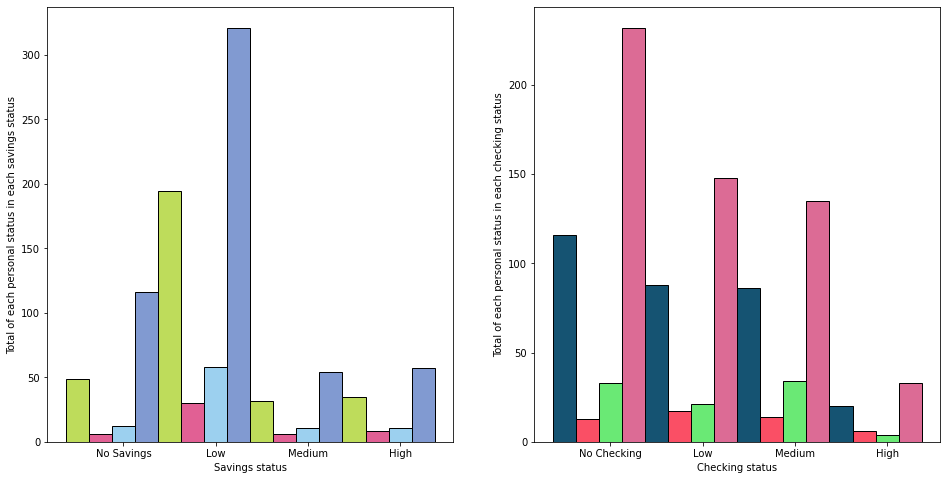

In [662]:
from matplotlib import pyplot as plt
from pandas import Series, DataFrame
import numpy as np
import random

fig, ax = plt.subplots(1,2, sharex=False, sharey = False)
fig.set_size_inches(16,8)
xs = np.arange(1,5)
width = 1
##for savings
ct = df.groupby(['savings_status', 'personal_status'])['personal_status'].count()
ct.name = 'count'
ct= DataFrame(ct)
ct = ct.reset_index()
pset = ct['personal_status'].unique()
labels1 = ['No Savings', 'Low', 'Medium', 'High' ]
number_of_colors = len(pset)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
for x, sav in zip(xs, labels1):
    vals = np.arange(x-(width/2), x+(width/2), (width/len(pset)))   
    i=0
    for p,c in zip(pset,colors):
        val = vals[i]
        rects1 = ax[0].bar(val, ct[(ct['personal_status']==p) & (ct['savings_status']==sav)]['count'].values, width/len(pset), label=p, color = c, edgecolor='black')
        i=i+1  
ax[0].set_xticks(xs)
ax[0].set_xticklabels(labels1)
ax[0].set_xlabel('Savings status')
ax[0].set_ylabel('Total of each personal status in each savings status')


##for checking
ct = df.groupby(['checking_status', 'personal_status'])['personal_status'].count()
ct.name = 'count'
ct= DataFrame(ct)
ct = ct.reset_index()
pset = ct['personal_status'].unique()
labels2 = ['No Checking', 'Low', 'Medium', 'High' ]
number_of_colors = len(pset)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
for x, sav in zip(xs, labels2):
    vals = np.arange(x-(width/2), x+(width/2), (width/len(pset)))   
    i=0
    for p,c in zip(pset,colors):
        val = vals[i]
        rects2 = ax[1].bar(val, ct[(ct['personal_status']==p) & (ct['checking_status']==sav)]['count'].values, width/len(pset), label=p, color = c,edgecolor='black')
        i=i+1
ax[1].set_xticks(xs)
ax[1].set_xticklabels(labels2)
ax[1].set_xlabel('Checking status')
ax[1].set_ylabel('Total of each personal status in each checking status')
#ct

3.2) For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

<AxesSubplot:xlabel='property_magnitude', ylabel='Average customer age'>

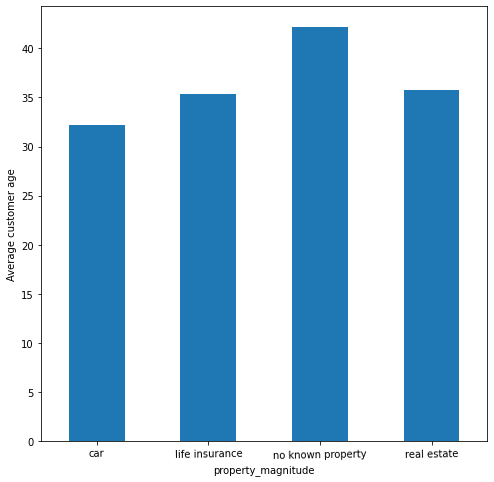

In [663]:
r = df[df['credit_amount']>4000]
r = r.groupby('property_magnitude')['age'].mean()
plt.figure(figsize=(8,8))
r.plot(kind='bar', rot=1, xlabel = 'property_magnitude', ylabel = 'Average customer age')

3.3) For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status,
Credit history,
Job

In [664]:
def getLabels(strg, fr):
    labels = []
    sizes=[]
    vc = fr.groupby(strg)[strg].count()
    for i in vc.index:
        labels.append(i)
        sizes.append(vc[i])
    return labels, sizes

Text(0.5, 1.0, 'Job')

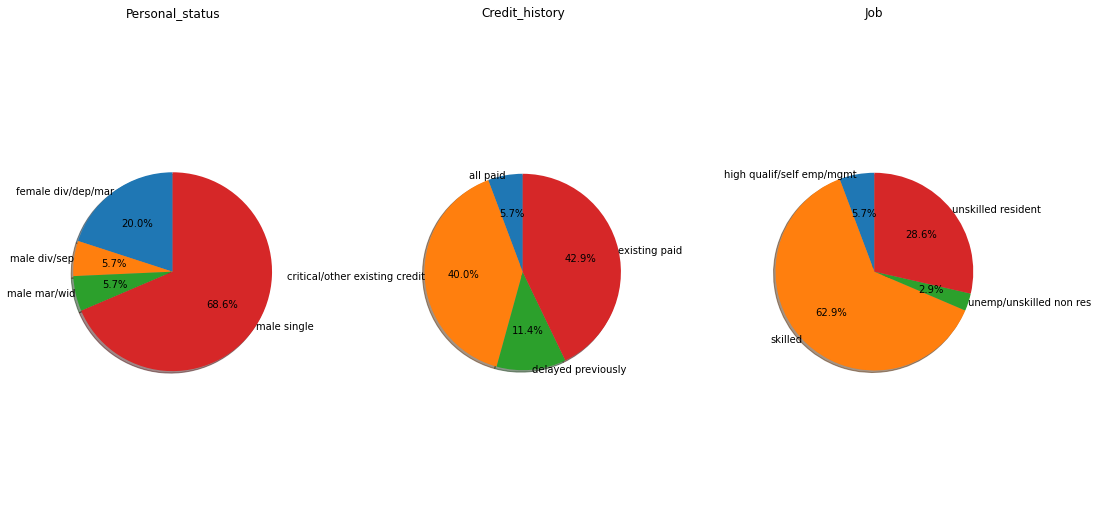

In [669]:
fr = df[(df['savings_status']=='High') & (df['age']>40)]
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16,10)
fig.tight_layout(pad=10.0)
labels, sizes = getLabels('personal_status', fr)
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, labeldistance=1.0, startangle=90)
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0].set_title('Personal_status')
labels, sizes = getLabels('credit_history', fr)
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, labeldistance=1.0,startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1].set_title('Credit_history')
labels, sizes = getLabels('job', fr)
ax[2].pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, labeldistance=1.0, startangle=90)
ax[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2].set_title('Job')    